<a href="https://colab.research.google.com/github/Glory-Godwin/Glory-Godwin/blob/main/Raisin_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raisin Classification Model: Predicting Kecimen vs Besni

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [ ]:
data =pd.read_excel(r"C:\Users\Name\Downloads\Raisin_Dataset.xlsx")

In [ ]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


## Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


## Defining Features and Target

In [ ]:
x=data.drop(columns=["Class"])

y=data["Class"]

In [ ]:
x

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


## Feature Encoding

In [ ]:
le=LabelEncoder()

le.fit_transform(y)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Feature Correlation

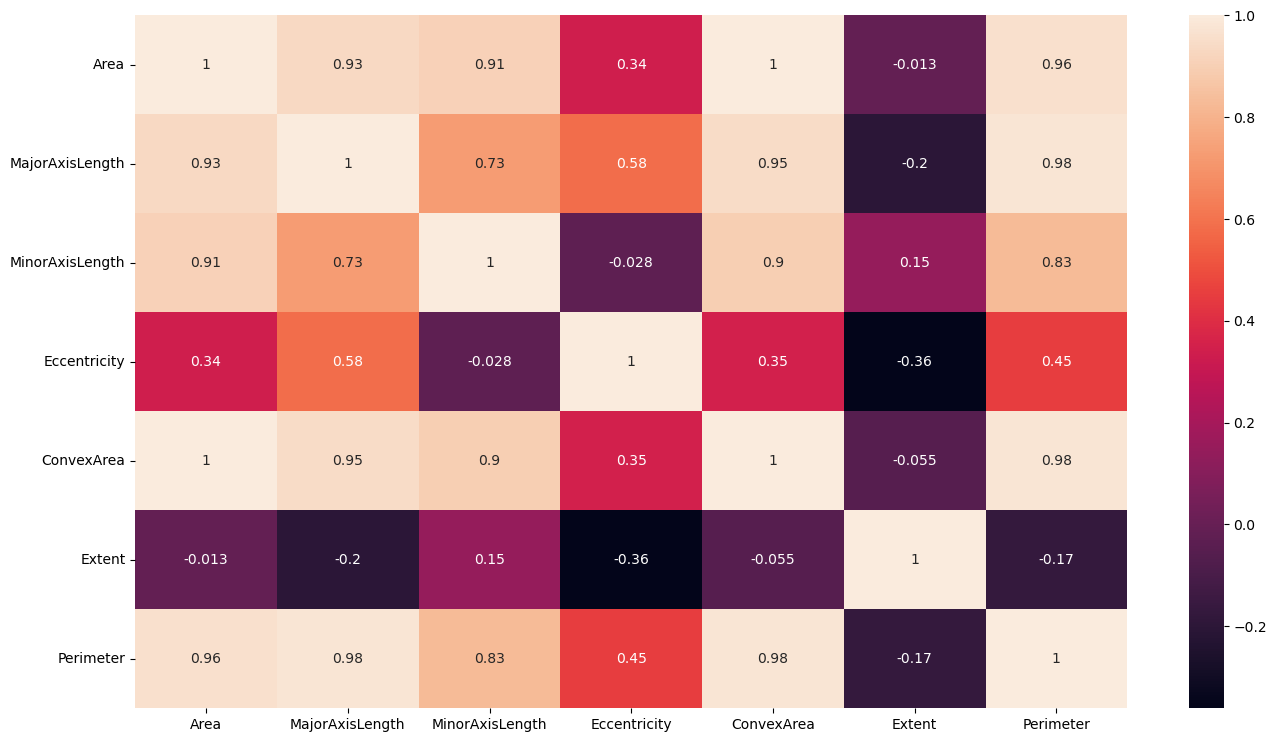

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(x.corr(), annot=True)
plt.show()

## Feature Scaling

In [ ]:
scaler= StandardScaler() # we're using standard scaler method to scale, from -1 to 1
scaledX = scaler.fit_transform(x)

In [ ]:
scaledX

array([[-0.00718637,  0.09757695, -0.02395819, ..., -0.01570903,
         1.10674264,  0.06627397],
       [-0.32421719, -0.20901207, -0.22929222, ..., -0.3042482 ,
        -0.28777679, -0.16125245],
       [ 0.07829241,  0.09775835,  0.23698797, ...,  0.06211335,
        -1.15824974,  0.15594468],
       ...,
       [ 0.30407232,  0.00670023,  0.88767401, ...,  0.37004063,
         0.77828911,  0.46387322],
       [ 0.14671134,  0.39160036, -0.00624644, ...,  0.15871029,
        -0.76180437,  0.3385864 ],
       [-0.05631357,  0.69976181, -0.78493347, ..., -0.04881606,
        -1.26290931,  0.39090133]])

## Train and Test split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(scaledX,y,test_size=0.2,random_state=20)

In [ ]:
X_train.shape

(720, 7)

In [ ]:
X_test.shape

(180, 7)

## Logistic Regression

In [ ]:
log=LogisticRegression(random_state=42)
log.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
log_preds=log.predict(X_test)

In [ ]:
accuracy_score(y_test,log_preds)

0.85

In [ ]:
print(classification_report(y_test,log_preds))

              precision    recall  f1-score   support

       Besni       0.88      0.81      0.84        90
     Kecimen       0.82      0.89      0.86        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



## 5-fold cross validation

In [ ]:
model=RandomForestClassifier()
scores= cross_validate(model,x,y,cv=5,scoring=["accuracy","precision","recall","f1"])

In [ ]:
print(scores)

{'fit_time': array([0.38071489, 0.33401871, 0.37212491, 0.35700917, 0.33580542]), 'score_time': array([0.03223968, 0.03376412, 0.02614808, 0.01587701, 0.01988983]), 'test_accuracy': array([0.87777778, 0.87777778, 0.85555556, 0.83888889, 0.84444444]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1': array([nan, nan, nan, nan, nan])}
